# Insights of Boston Airbnb

## CRISP-DM Process 

**Business Understanding**

Boston Airbnb listing dataset is available on Kaggle, our prime motive is to enlighten traits of given listings.

Three questions are raised around the interest:
1. What is the price range with highest no. of listings?  
2. What are the most popular amenities?  
3. What are the top 10 neighbourhood?  

**Data Understanding**

Boston Airbnb listing has 3585 rows, 95 columns representing listing attributes.

**Prepare Data**

The preparation includes data cleaning, filling missing value.

**Data Modeling**

We will use ML models to get some interesting insights.  

**Evaluate the Results**

Results are summarized in the Medium post.
https://medium.com/@divvu/insights-of-boston-airbnb-8d3452d6f8ef?sk=75d5f652dc7235d5bb33a8b76d8b3ace

## Importing Libraries

In [153]:
# Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn ML Modules
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder,OneHotEncoder,StandardScaler 

# Dismiss the warnings
import warnings
warnings.filterwarnings('ignore')


## Dataset Observation ##

In [154]:
# Import the dataset
listing=pd.read_csv('listings.csv')

In [127]:
# Observe the data structure
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [155]:
# Describe the dataset
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [156]:
# Observe missing data
listing.isnull().sum()/listing.shape[0]

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.039888
space                               0.294840
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.394700
notes                               0.550907
transit                             0.359833
access                              0.415342
interaction                         0.433473
house_rules                         0.332497
thumbnail_url                       0.167085
medium_url                          0.167085
picture_url                         0.000000
xl_picture_url                      0.167085
host_id                             0.000000
host_url                            0.000000
host_name                           0.000000
host_since

 ## Q1. Price Range With Highest Listings

In [178]:
# Convert Price to numerics.

listing['price']=listing['price'].str.replace('[$,]','',regex=True).astype(float)

print('Average per night price of listings is ${0:.2f} with a minimum price of ${1:.2f} and a maximum price of whopping ${2:.2f}.'.format(listing['price'].mean(),listing['price'].min(),listing['price'].max()))

Average per night price of listings is $173.93 with a minimum price of $10.00 and maximum price of whooping $4000.00.


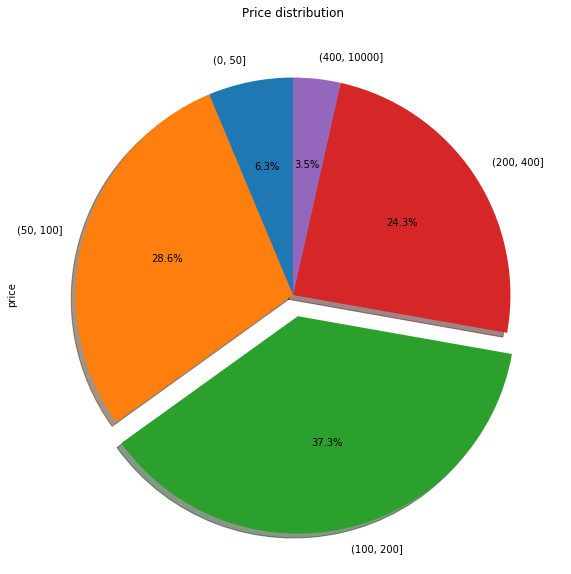

In [190]:
# Plot the price distribution
plt.title('Price distribution')
explode = (0, 0, 0.1, 0,0)
out = pd.cut(listing.price, bins=[0, 50, 100, 200, 400, 10000], include_lowest=False)
sizes = out.cat.categories
ax = out.value_counts(sort=False).plot.pie(figsize=(10,10), explode=explode,autopct='%1.1f%%', shadow=True, startangle=90)

#### We can see that the most of listings are priced in the range of 100 to 200 $.

## Q2. Most Popular Amenities

In [159]:
#cleaning the description of amenities
amenities = listing['amenities'].apply(lambda x: [amenity.replace(
    '"', "").replace("{", "").replace("}", "") for amenity in x.split(",")])

In [160]:
amenities

0       [TV, Wireless Internet, Kitchen, Free Parking ...
1       [TV, Internet, Wireless Internet, Air Conditio...
2       [TV, Cable TV, Wireless Internet, Air Conditio...
3       [TV, Internet, Wireless Internet, Air Conditio...
4       [Internet, Wireless Internet, Air Conditioning...
5       [Cable TV, Wireless Internet, Air Conditioning...
6       [TV, Internet, Wireless Internet, Kitchen, Fre...
7       [TV, Internet, Wireless Internet, Air Conditio...
8       [Wireless Internet, Pets live on this property...
9       [TV, Cable TV, Internet, Wireless Internet, Ai...
10      [TV, Wireless Internet, Air Conditioning, Kitc...
11      [TV, Cable TV, Internet, Wireless Internet, Ai...
12      [Cable TV, Wireless Internet, Air Conditioning...
13      [TV, Internet, Wireless Internet, Air Conditio...
14      [Internet, Wireless Internet, Kitchen, Free Pa...
15      [TV, Internet, Wireless Internet, Air Conditio...
16      [TV, Cable TV, Internet, Wireless Internet, Ki...
17      [TV, W

In [161]:
#set MultiLabelBinarizer to separate amenities
mlb = MultiLabelBinarizer()
amenities_label = pd.DataFrame(mlb.fit_transform(
    amenities), columns=mlb.classes_, index=amenities.index)

# print(amenities_count.index)

# Sum the amenities labels
amenities_count=amenities_label.sum().sort_values(ascending=False)
print('There are total {0} amenities.'.format(len(amenities_label.columns)))

There are total 46 amenities.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

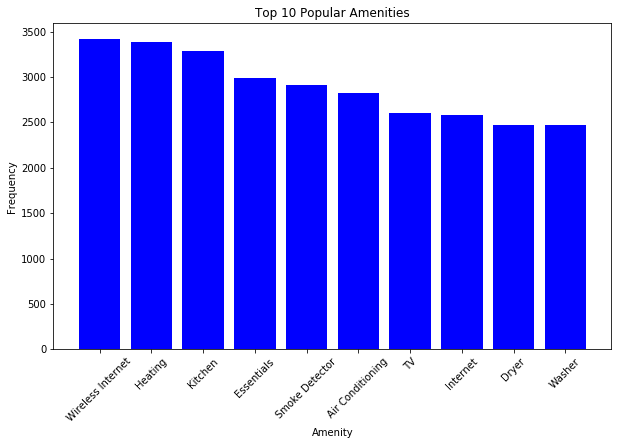

In [152]:
#Plotting top 10 frequent amenities.
plt.figure(figsize=(10,6))
plt.bar(amenities_count[:10].index,amenities_count[:10].values,color='b')
plt.title('Top 10 Popular Amenities')
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

#### So, Yeah Wireless Internet is the most popular amentity.

## Q3. Top 10 Neighbourhood

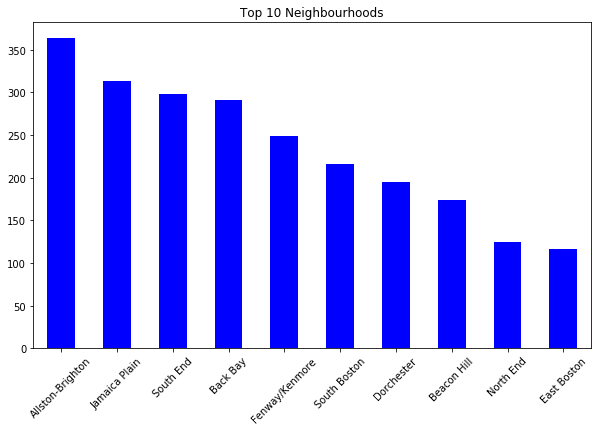

In [203]:
neighbour = listing.neighbourhood

neighbour.value_counts().nlargest(10).plot(kind='bar', rot=45,title='Top 10 Neighbourhoods', color="b", figsize=(10,6))

#### We can see that Allston-Brighton has heighest no. of listings.